# <center> Fraud Detection Model </center>

A Machine Learning model for predicting fraudulent transactions for a financial company and using insights from the model to develop an actionable plan.

## Import and Assess Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There is no missing values in the dataset

# Exploratory Data Analysis

<AxesSubplot:xlabel='isFraud', ylabel='count'>

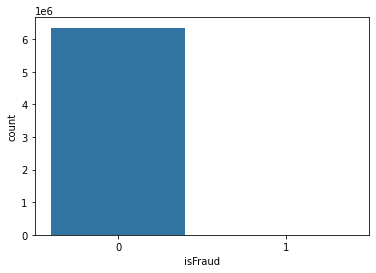

In [7]:
sns.countplot(x='isFraud', data=df)

In [8]:
df['isFraud'].sum()

8213

Out of <b>6362620</b> entries, there are only <b>8213</b> Fraud transactions. This implies that the dataset is highly imbalanced.

## Let's check each attribute one by one.
### 1. step

In [9]:
df['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

<AxesSubplot:xlabel='step'>

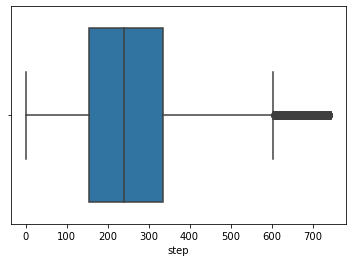

In [10]:
sns.boxplot(data=df, x='step')

### 2. Type

In [11]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

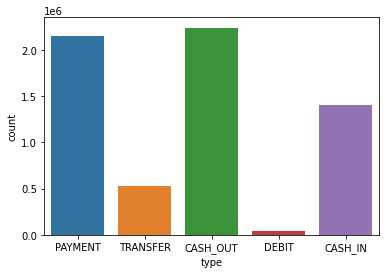

In [12]:
sns.countplot(x='type', data=df)

## 1-Hot Encoding
Since the data is categorical, we need to convert it to numbers. Let's use 1 hot encoding (dummy variables) to convert the categorical data into numerical.

In [13]:
dummy_type = pd.get_dummies(df['type'])
df = pd.concat([df,dummy_type],axis=1)
df = df.drop(['type','DEBIT'],axis=1)

In [14]:
#Because the data in type 'DEBIT' were least in volume, we decided to drop "DEBIT"
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


### 3. OldbalanceDest and newbalanceDest
As mentioned in data dictionary, that there is not information for customers that start with M (Merchants).

Let's explore this data

In [15]:
df[df['nameDest'].str.startswith('M')]

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0
5,1,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0,0,0,1,0
6,1,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0,0,0,1,0
6362314,718,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0,0,0,1,0
6362316,718,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0,0,0,1,0
6362318,718,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0,0,0,1,0


Let's see how many of these transactions are actually Fraud

In [16]:
df[(df['isFraud']==1) & df['nameDest'].str.startswith('M')]

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,PAYMENT,TRANSFER


## Cleaning and updating Data attributes

Since, none of the transactions whose name starts with M is a fraud transaction, we can update 'newbalanceDest' with the 'amount' attribute that is debited from the Origin account. We will leave the 'oldbalanceDest' as it is.

In [17]:
ind = df[df['nameDest'].str.startswith('M')]['newbalanceDest'].index
df['newbalanceDest'].iloc[ind] = df['newbalanceDest'].iloc[ind] + df['amount'].iloc[ind]

/var/folders/t0/4lxvnww52ngc9sw36v7_bgx00000gn/T/ipykernel_3487/2058749658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['newbalanceDest'].iloc[ind] = df['newbalanceDest'].iloc[ind] + df['amount'].iloc[ind]


In [18]:
df[df['nameDest'].str.startswith('M')].head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,9839.64,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,1864.28,0,0,0,0,1,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,11668.14,0,0,0,0,1,0
5,1,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,7817.71,0,0,0,0,1,0
6,1,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,7107.77,0,0,0,0,1,0


### 4. nameOrig and nameDest

Since both these attributes are used to identify the transactions, They have very little relevence in our model. So, we will drop these two attributes

In [19]:
df = df.drop(['nameOrig','nameDest'],axis=1)

In [20]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,9839.64,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,1864.28,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.00,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.00,1,0,0,1,0,0
4,1,11668.14,41554.0,29885.86,0.0,11668.14,0,0,0,0,1,0


## Multicollinearity
Let's check if there is any multi-collinearity between the attributes

### 1. Using Heatmap

<AxesSubplot:>

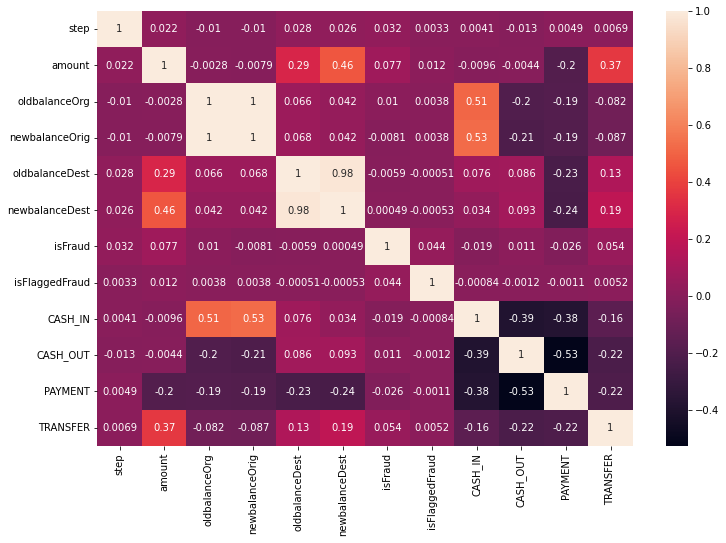

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

From the above, heatmap, it i clear that there is high multi-colliniearity between 'newbalanceOrg' and 'oldbalanceOrig'as well as 'OldbalanceDest' and 'newbalanceDes'.

Let us explore further, the multi-collinearity between them.

### 2. Using Variance Inflation factor

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

In [23]:
def calculate_vif(features):
    X = df[features]
    
    vif = pd.DataFrame()
    vif['Attribute'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [24]:
features = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
calculate_vif(features)

,Attribute,VIF
0,oldbalanceOrg,463.039520
1,newbalanceOrig,463.980732
2,oldbalanceDest,24.848358
3,newbalanceDest,24.647932


In [25]:
features.remove('oldbalanceOrg')
calculate_vif(features)

,Attribute,VIF
0,newbalanceOrig,1.030982
1,oldbalanceDest,24.193269
2,newbalanceDest,24.047768


In [26]:
features.remove('oldbalanceDest')
calculate_vif(features)

,Attribute,VIF
0,newbalanceOrig,1.016366
1,newbalanceDest,1.016366


In [27]:
df = df.drop(['oldbalanceOrg','oldbalanceDest'], axis=1)

Let us check the correlation again

<AxesSubplot:>

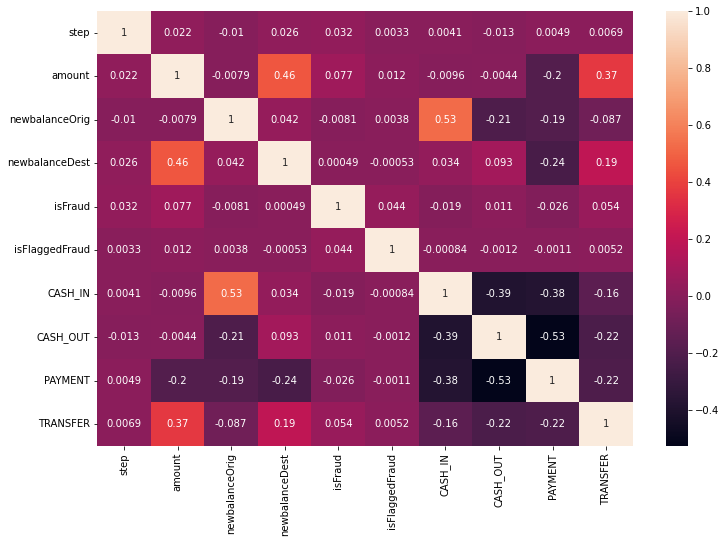

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

# Create Machine Learning model
Now, that the multicollinearity problem is solved in our dataset, let's create a machine learning model to predict whether the transaction is Fraud or not.
Let's first split the dataset into train and test data set.

In [29]:
df.head()

,step,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,PAYMENT,TRANSFER
0,1,9839.64,160296.36,9839.64,0,0,0,0,1,0
1,1,1864.28,19384.72,1864.28,0,0,0,0,1,0
2,1,181.00,0.00,0.00,1,0,0,0,0,1
3,1,181.00,0.00,0.00,1,0,0,1,0,0
4,1,11668.14,29885.86,11668.14,0,0,0,0,1,0


## Train_test_split

In [30]:
#import libraries
from sklearn.model_selection import train_test_split

X = df.drop('isFraud',axis=1)
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [31]:
y_test.value_counts()

0    1906369
1       2417
Name: isFraud, dtype: int64

### Since, the train and test data is highly imbalanced, we will adopt undersampling to tackle the issue

## Undersampling using 'resample':

In [32]:
from sklearn.utils import resample

df_train = pd.concat([X_train,y_train], axis=1)
df_test = pd.concat([X_test,y_test],axis=1)
is_fraud = df_train[df_train.isFraud == 1]
not_fraud = df_train[df_train.isFraud == 0]

is_fraud_t = df_test[df_test.isFraud == 1]
not_fraud_t = df_test[df_test.isFraud == 0]

In [33]:
#Undersampling the majority

undersample = resample(not_fraud, n_samples= len(is_fraud), random_state=101)
undersample_train = pd.concat([is_fraud, undersample])
undersample_t = resample(not_fraud_t, n_samples= len(is_fraud_t), random_state=101)
undersample_test = pd.concat([is_fraud_t, undersample_t])

In [34]:
undersample_train['isFraud'].value_counts()

1    5796
0    5796
Name: isFraud, dtype: int64

In [35]:
undersample_test['isFraud'].value_counts()

1    2417
0    2417
Name: isFraud, dtype: int64

In [36]:
#Seperate undersampled data in X and y sets
undersample_X_train = undersample_train.drop('isFraud', axis=1)
undersample_y_train = undersample_train['isFraud']
undersample_X_test = undersample_test.drop('isFraud', axis=1)
undersample_y_test = undersample_test['isFraud']

In [37]:
#import ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
logR = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)
nb = MultinomialNB()
dtree = DecisionTreeClassifier()
RandomF = RandomForestClassifier()

In [39]:
logR.fit(undersample_X_train, undersample_y_train)
knn.fit(undersample_X_train, undersample_y_train)
nb.fit(undersample_X_train, undersample_y_train)
dtree.fit(undersample_X_train, undersample_y_train)
RandomF.fit(undersample_X_train, undersample_y_train)

RandomForestClassifier()

In [40]:
pred_LR = logR.predict(undersample_X_test)
pred_knn = knn.predict(undersample_X_test)
pred_nb = nb.predict(undersample_X_test)
pred_dtree = dtree.predict(undersample_X_test)
pred_rf = RandomF.predict(undersample_X_test)

In [41]:
from sklearn.metrics import classification_report, accuracy_score,f1_score

In [42]:
# classification report - LR

classification_report_LR = classification_report(undersample_y_test,pred_LR)
print("Classification Report - Logistic Regression")
print(classification_report_LR)

print("----------------------------------------------------------------------------------------")

# classification report - KNN

classification_report_knn = classification_report(undersample_y_test,pred_knn)
print("Classification Report - K Nearest Neighbour")
print(classification_report_knn)

print("----------------------------------------------------------------------------------------")

# classification report - NB

classification_report_nb = classification_report(undersample_y_test,pred_nb)
print("Classification Report - Naive Bayes")
print(classification_report_nb)

print("----------------------------------------------------------------------------------------")

# classification report - DT

classification_report_dtree = classification_report(undersample_y_test,pred_dtree)
print("Classification Report - Decision Tree")
print(classification_report_dtree)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(undersample_y_test,pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.46      0.60      2417
           1       0.63      0.91      0.74      2417

    accuracy                           0.69      4834
   macro avg       0.73      0.69      0.67      4834
weighted avg       0.73      0.69      0.67      4834

----------------------------------------------------------------------------------------
Classification Report - K Nearest Neighbour
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2417
           1       0.83      0.83      0.83      2417

    accuracy                           0.83      4834
   macro avg       0.83      0.83      0.83      4834
weighted avg       0.83      0.83      0.83      4834

----------------------------------------------------------------------------------------
Classification Report - Naive Bayes
              precision    recall  f1-score 

It is clear from the above results, that Decision Tree and Random Forest outperforms other ML algorithms.

# Let us answer the questions that were asked

### 1. Data cleaning including missing values, outliers and multi-collinearity.

In this task, we have cleaned the data by tackling the missing values. We have replaced the missing values in case of Destination transaction of Merchants, by updating the amount of transaction to their newbalanceDest.
We also have ensured there is no muti-collinearity between the attributes. We have successfully discarded all multicollinear attributes.

### 2. Describe your fraud detection model in elaboration.

In this model, I have used undersampling to tackle the issue of data imbalancing. There were only 8213 fraud transactions, out of 6362620 entries. To train our model, I have undersampled the majority. Now, there are 11592 samples with equal distribution of fraud and legit transactions. Similarly, I undersampled test data.
I have created five Machine Learning models, namely, Logistic Regression, KNN, Multinomial Naive Bayes, Decision Tree and Random Forest.
To test the performace, I have printed out the classification report. As for fraud detection models, Precision and F1 scores matters the most, Random Forest Classifier has turned out to best ML Model for our Dataset with a precision of 93% anf F1 score of 93%.

### 3.How did you select variables to be included in the model?

On the basis of mutli-collinearity, I have removed certain variables. I also removed identifier variables like 'nameOrig' and 'nameDest'. All other variables had a direct dependence on our predictor variable, i.e., 'isFraud' and were independent of each other. Hence, they were included in our final model.

### 4. What are the key factors that predict fraudulent customer?

The key factors predicting a fraudulent customer includes:
1. New Accounts getting funds from unknown sources
2. Unverified transactions
3. Unsusual transactions with large sums

### 5. Do these factors make sense? If yes, How? If not, How not?

Yes these factors makes a lot of sense. Suppose a customer is dormant for most of the year and suddenly he/she carries unsual transaction with large sums, it is naturally assumed that these transaction are fraudulent.

### 6. What kind of prevention should be adopted while company update its infrastructure?

1. Two factor authentications as well as biometric authentication must be provided
2. Push alerts must be provided by the company to the customers Mobile phones, so they can report any fraudulent activity.
3. Using secured connections (while using Internet for transactions)
4. Avoid downloading unknown/unverified apps in their smartphones which could steal user's credentials.
5. Beware of scam calls and knowledge of red flags during their conversation.

### 7. Assuming these actions have been implemented, how would you determine if they work?

1. Ensuring their banking/transactions Apps are updated.
2. Keeping their passbooks/statements updated and checking them on weekly basis.
3. Awareness about scams and its prevention to their customers.